# Import Libraries

In [5]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

# Helping Functions:

## Question # 01

In [6]:

# Generate Random List
def generate_random_list(size, value_range=(0, 10000),SEED = 42 ):
    random.seed(SEED)
    """Generate a list of random integers within a given range."""
    return [random.randint(*value_range) for _ in range(size)]

# Measure Runtime of a Sorting Algorithm
def measure_runtime(sorting_function, size, runs=5):
    """
    Measure the average runtime over multiple runs.
    
    Parameters:
    - sorting_function: The sorting function to test.
    - size: Size of the input array.
    - runs: Number of runs to average over.

    Returns: Average time (in seconds) to sort the array.
    """
    total_time = 0.0
    for _ in range(runs):
        arr = generate_random_list(size)
        start_time = time.time()
        try:
            sorting_function(arr)
        except TypeError as e:
            # print(f"Error: {e}")
            sorting_function(arr, 0, len(arr) - 1)
        end_time = time.time()
        total_time += (end_time - start_time)
    return total_time / runs

# Fine-tuned Theoretical Time Calculation
def theoretical_times_bubble_sort(sizes, a, b):
    """Calculate theoretical times using the formula a * n^2 + b."""
    return [(a * n**2 + b) for n in sizes]

# Plotting Function
def plot_results(sizes, practical_times, theoretical_times, a, b,theoretical_exp):
    """Plot practical and theoretical runtime comparisons."""
    plt.figure(figsize=(12, 6))

    # Plot 1: Linear scale comparison
    plt.subplot(121)
    plt.plot(sizes, practical_times, marker='o', label='Practical Time')
    plt.plot(sizes, theoretical_times, marker='x', 
             label=f'Theoretical Time ({a} * {theoretical_exp} + {b})')

    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (seconds)')
    plt.title('Linear Scale: Theoretical vs Practical Time Complexity')
    plt.legend()
    plt.grid(True)

    # Plot 2: Logarithmic y-axis comparison
    plt.subplot(122)
    plt.plot(sizes, practical_times, marker='o', label='Practical Time')
    plt.plot(sizes, theoretical_times, marker='x', label=f'Theoretical Time {theoretical_exp}')

    plt.yscale('log')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Logarithmic Scale: Time (seconds)')
    plt.title('Log Scale: Theoretical vs Practical Time Complexity')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()



### Part a: Bubble Sort

Running Bubble Sort...
Size: 100, Time: 0.000400 seconds
Size: 644, Time: 0.014003 seconds
Size: 1188, Time: 0.052012 seconds
Size: 1733, Time: 0.112827 seconds
Size: 2277, Time: 0.196010 seconds
Size: 2822, Time: 0.302271 seconds
Size: 3366, Time: 0.441011 seconds
Size: 3911, Time: 0.602281 seconds
Size: 4455, Time: 0.785577 seconds
Size: 5000, Time: 0.984055 seconds


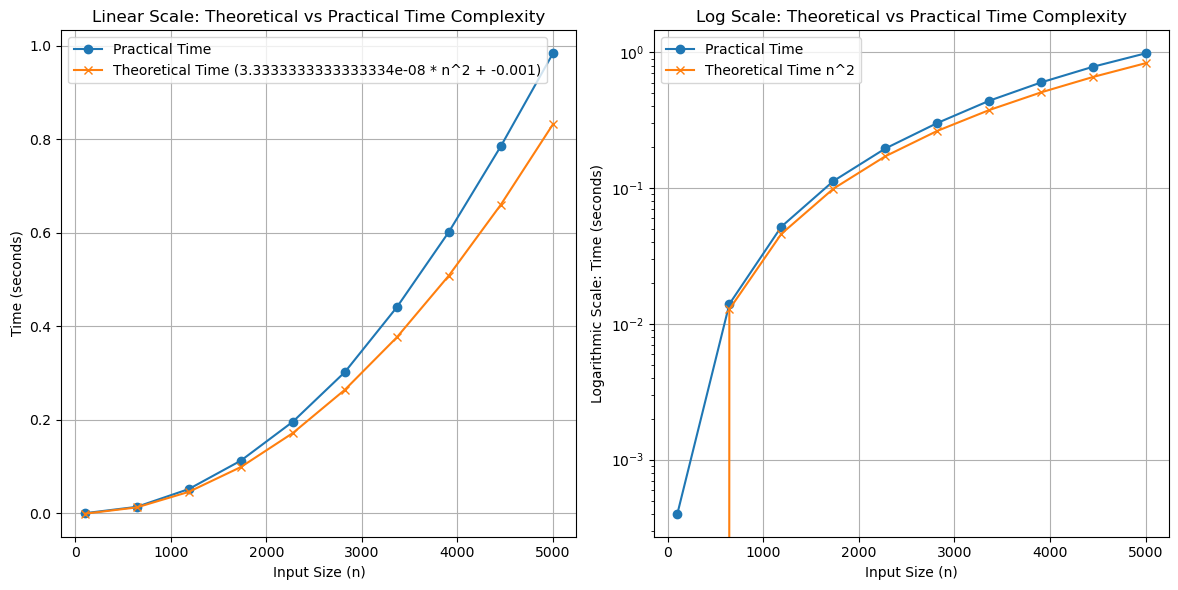

In [7]:
# Sorting Algorithm: Bubble Sort
def bubble_sort(arr):
    """Perform Bubble Sort on the input array."""
    n = len(arr)
    for i in range(n - 1):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                # Swap adjacent elements if they are in the wrong order
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
# Main Execution Function
def main(
        sizes : list[int] = [100, 300, 500, 700, 900],
        func : callable = None, a : float = 1e-7 / 3,
        b : float = -0.001,theoretical_times_func : callable = None,
        theoretical_exp : str = "n^2"):

    """Main function to run and compare sorting algorithm performance."""
    practical_times = []  # Store measured times

    # Measure the time for Bubble Sort on different input sizes
    print("Running Sorting Algo ...")
    for size in sizes:
        time_taken = measure_runtime(func, size)
        print(f"Size: {size}, Time: {time_taken:.6f} seconds")
        practical_times.append(time_taken)

    # Calculate the theoretical times
    theoretical = theoretical_times_func(sizes, a, b)
    # Plot the results
    plot_results(sizes, practical_times, theoretical, a, b,theoretical_exp=theoretical_exp)

# Run the program
if __name__ == "__main__":
    # Fine-tuned constants for the theoretical model
    a = 1e-7 / 3  # Scaling factor for n^2
    b = -0.001    # Offset constant
    input_sizes = [100, 300, 500, 700, 900]
    input_sizes = np.linspace(start=100, stop = 5000,num =10, dtype=int)
    main(
        sizes=input_sizes,
        func = bubble_sort,
        a=1e-7 / 3,
        b=-0.001,
        theoretical_times_func=theoretical_times_bubble_sort,
        theoretical_exp="n^2")

Running Bubble Sort...
Size: 100, Time: 0.000200 seconds
Size: 644, Time: 0.000800 seconds
Size: 1188, Time: 0.001200 seconds
Size: 1733, Time: 0.002200 seconds
Size: 2277, Time: 0.003001 seconds
Size: 2822, Time: 0.003601 seconds
Size: 3366, Time: 0.004601 seconds
Size: 3911, Time: 0.005401 seconds
Size: 4455, Time: 0.006201 seconds
Size: 5000, Time: 0.007202 seconds


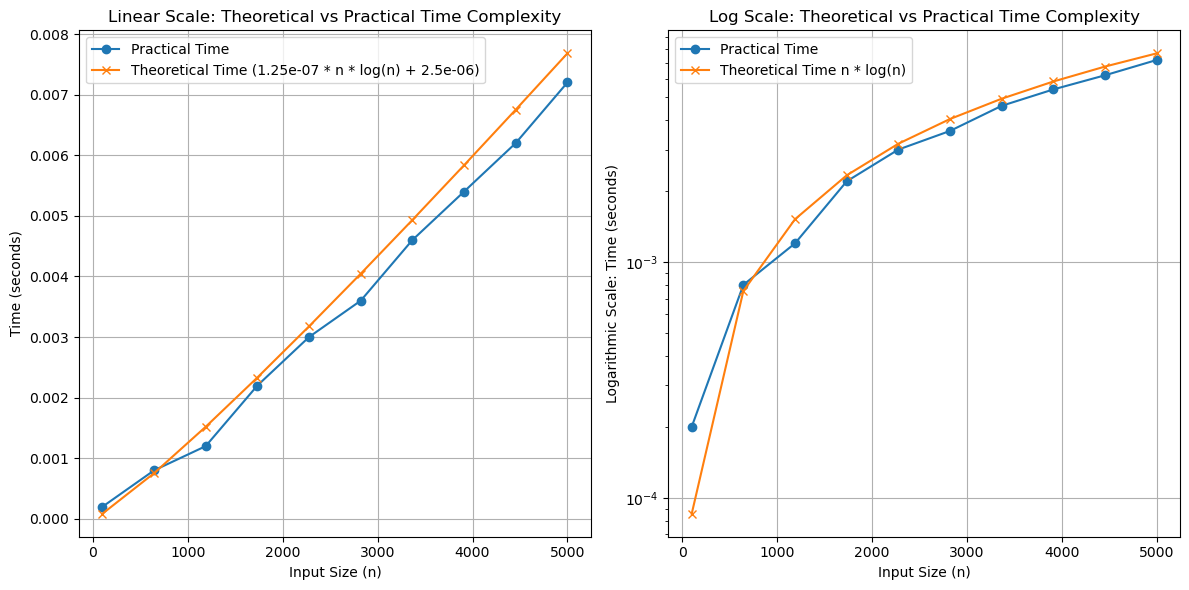

In [8]:

# Merge Sort Implementation
def merge(arr, left, mid, right):
    n1 = mid - left + 1
    n2 = right - mid

    # Create temporary arrays for the two halves
    L = arr[left:mid + 1]
    R = arr[mid + 1:right + 1]

    i = j = 0  # Indexes for left and right arrays
    k = left  # Index for merged array

    # Merge the two halves into the original array
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Copy any remaining elements from the left half
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    # Copy any remaining elements from the right half
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

def merge_sort(arr, left, right):
    """Recursively divide and sort the array in-place."""
    if left < right:
        mid = (left + right) // 2
        merge_sort(arr, left, mid)
        merge_sort(arr, mid + 1, right)
        merge(arr, left, mid, right)

def theoretical_times_merge_sort(sizes, a, b):
    """Calculate theoretical times using the formula a * n * log(n) + b."""
    return [(a * n * (np.log2(n)) + b) for n in sizes]

# Run the program
if __name__ == "__main__":
    # input_sizes = [100, 300, 500, 700, 900]
    input_sizes = np.linspace(start=100, stop = 5000,num =10, dtype=int)
    main(
        sizes=input_sizes,
        func = merge_sort,
        a= 1e-7 / 0.8,
        b = 2.5e-6, # Offset constant (can also experiment with this)
        theoretical_times_func=theoretical_times_merge_sort,
        theoretical_exp="n * log(n)"
        )
